In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/M.Tech Thesis/MyTable_0_priyal98.csv')

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(2078089, 20)

In [ ]:
df=df.sample(frac = 0.2)
df.shape

(415618, 20)

In [ ]:
X=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y=df.iloc[:,18]

In [ ]:
df_train = df.sample(frac = 0.8)
df_test = df.drop(df_train.index)

In [ ]:
def train_test_split(range):
  df_train = df.iloc[:range,:]
  df_test = df.drop(df_train.index)
  X_train=df_train.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
  y_train=df_train.iloc[:,18]
  X_test=df_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
  y_test=df_test.iloc[:,18]
  return X_train,y_train,X_test,y_test

In [ ]:
X_train=df_train.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y_train=df_train.iloc[:,18]
X_test=df_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y_test=df_test.iloc[:,18]

In [ ]:
y_true=y_test.tolist()



# **Decision Tree Regressor**

In [ ]:
# For k-fold cross validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import time

scores = cross_val_score(DecisionTreeRegressor(random_state = 0, criterion='squared_error', splitter='best', max_depth=None), X, y, cv=10)
scores

array([0.86094365, 0.86454611, 0.85775209, 0.8616744 , 0.85905422,
       0.85758033, 0.86432805, 0.86685799, 0.86375719, 0.85985768])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import time
 

regressor = DecisionTreeRegressor(random_state = 0, criterion='squared_error', splitter='best', max_depth=None)

train_size=[X_train.shape[0]]
train_time_DT=[]

for i in train_size:
  X_train,y_train,X_test,y_test = train_test_split(i)
  start = time.time()
  regressor.fit(X_train, y_train)
  end = time.time()
  train_time_DT.append(end-start)

In [ ]:
train_size=np.asarray(train_size)
train_time_DT=np.asarray(train_time_DT)
train_size=np.asarray(list(map(str,train_size)))

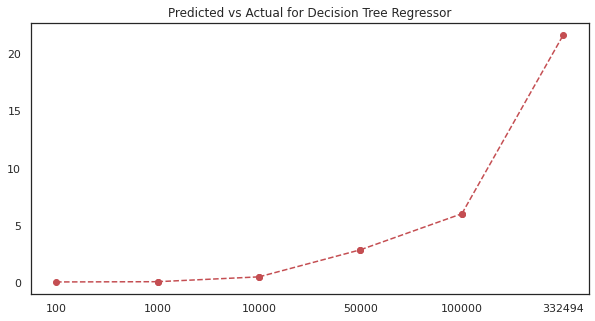

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
import matplotlib.pyplot as plt

train_size=['100', '1000', '10000', '50000', '100000', '332494']
for i in range(len(train_size)-1):
  plt.plot([train_size[i],train_size[i+1]], [train_time_DT[i],train_time_DT[i+1]], 'ro',linestyle="--")
plt.title('Predicted vs Actual for Decision Tree Regressor')
plt.show()

In [ ]:
start=time.time()
y_pred=regressor.predict(X_test)
end=time.time()

print('The time required to predict the outputs of the test dataset for decision tree regressor :', end-start)

The time required to predict the outputs of the test dataset for decision tree regressor : 0.055855751037597656


In [ ]:
y_pred_DT=y_pred
y_pred_DT

array([0.4807519 , 0.1087129 , 0.6270031 , ..., 0.584528  , 0.1198285 ,
       0.09834607])

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04766307030578965
Mean Squared Error: 0.00692461840598159
Root Mean Squared Error: 0.083214292073220721


In [ ]:
X_test_objid = df_test.iloc[:,0]
X_test_objid = np.asarray(X_test_objid)
list_string=list(map(str,X_test_objid))
objId=list_string[:100]
y_test_sample=list(y_test)[0:150]
y_pred_sample=list(y_pred)[0:150]

In [ ]:
sample_id=list(range(0, 150))

Text(0.5, 1.0, 'True vs Predicted values for Decision Tree Regressor')

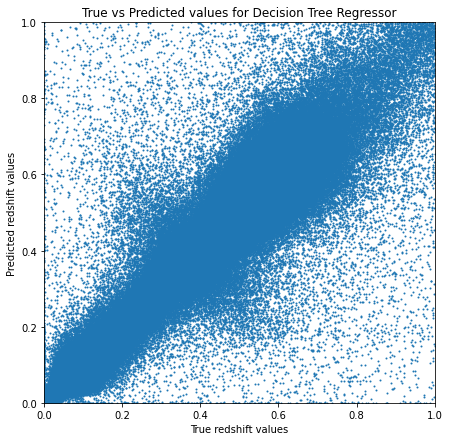

In [ ]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('True vs Predicted values for Decision Tree Regressor')

In [ ]:
score = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', score)

mse1 = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse1)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias1=np.mean(y_test- y_pred)
print('Bias :', bias1)

MAE : 0.04766307030578965
MSE : 0.00692461840598159
R2 score : 0.8551155027924896
Bias : -0.0007089234205254


# **Extra Tree Regressor**

In [ ]:
# For k-fold cross validation
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
import time

scores = cross_val_score(ExtraTreesRegressor(n_estimators=100, random_state=0, criterion='absolute_error', max_depth=None), X, y, cv=10)
scores

array([0.92625317, 0.92541342, 0.92372367, 0.92409629, 0.92419792,
       0.92689561, 0.9231702 , 0.92436649, 0.9258422 , 0.92539611])

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import time


regressor = ExtraTreesRegressor(n_estimators=100, random_state=0, criterion='absolute_error', max_depth=None)

train_size=[100, 1000, 10000, 50000, 100000, X_train.shape[0]]
train_time_ET=[]

for i in train_size:
  X_train,y_train,X_test,y_test = train_test_split(i)
  start = time.time()
  regressor.fit(X_train, y_train)
  end = time.time()
  train_time_ET.append(end-start)

In [ ]:
train_size=np.asarray(train_size)
train_time_ET=np.asarray(train_time_ET)
train_size=np.asarray(list(map(str,train_size)))

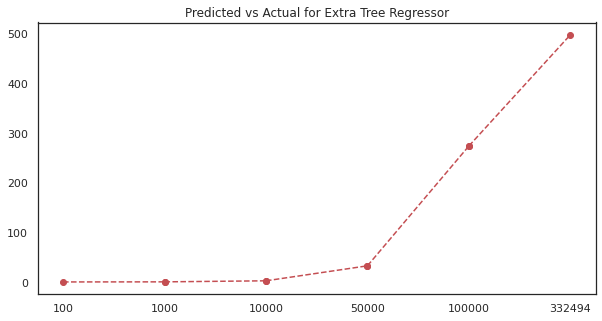

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
import matplotlib.pyplot as plt

for i in range(len(train_size)-1):
  plt.plot([train_size[i],train_size[i+1]], [train_time_ET[i],train_time_ET[i+1]], 'ro',linestyle="--")
plt.title('Predicted vs Actual for Extra Tree Regressor')
plt.show()

In [ ]:
start=time.time()
y_pred=regressor.predict(X_test)
end=time.time()

print('The time required to predict the outputs of the test dataset for extra tree regressor :', end-start)

The time required to predict the outputs of the test dataset for extra tree regressor : 3.1297545433044434


In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred_ET=y_pred

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03428253123158905
Mean Squared Error: 0.00373267029142535
Root Mean Squared Error: 0.0588666967467185


In [ ]:
X_test_objid = df_test.iloc[:,0]
X_test_objid = np.asarray(X_test_objid)
objId=list(map(str,X_test_objid))
y_test_sample=list(y_test)[0:150]
y_pred_sample=list(y_pred)[0:150]
sample_id=list(range(0, 150))

Text(0.5, 1.0, 'True vs Predicted values for Extra Trees Regressor')


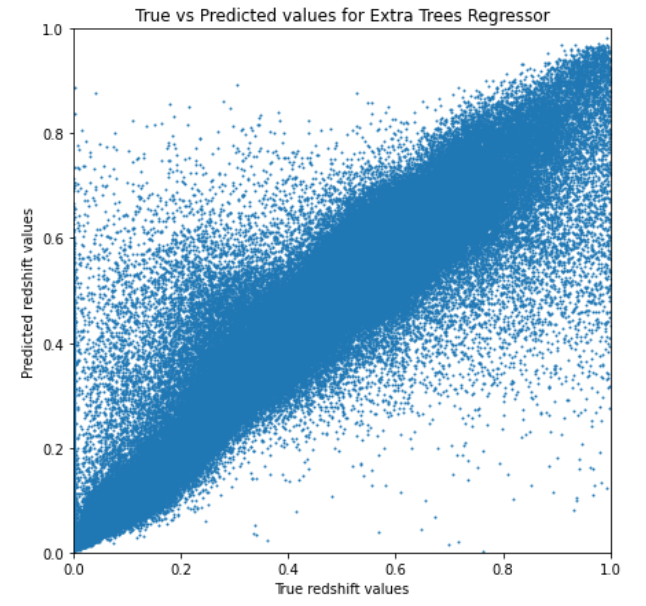

In [11]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('True vs Predicted values for Extra Trees Regressor')

In [ ]:
score = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', score)

mse1 = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse1)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias1=np.mean(y_test- y_pred)
print('Bias :', bias1)

MAE :0.03428253123158905
MSE : 0.03428253123158905
R2 score : 0.921900964588933
Bias : -0.00066736449032


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import time

scores = cross_val_score(RandomForestRegressor(n_estimators=50, random_state=0, criterion='squared_error', max_depth=None), X, y, cv=10)
scores

array([0.9337161 , 0.93290281, 0.93294681, 0.93215499, 0.92918966,
       0.93220404, 0.92860961, 0.93222681, 0.93277149, 0.93074105])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time

regressor = RandomForestRegressor(n_estimators=50, random_state=0, criterion='squared_error', max_depth=None)

train_size=[X_train.shape[0]]
train_time_RF=[]

for i in train_size:
  X_train,y_train,X_test,y_test = train_test_split(i)
  start = time.time()
  regressor.fit(X_train, y_train)
  end = time.time()
  train_time_RF.append(end-start)

In [ ]:
train_size=np.asarray(train_size)
train_time_RF=np.asarray(train_time_RF)
train_size=np.asarray(list(map(str,train_size)))

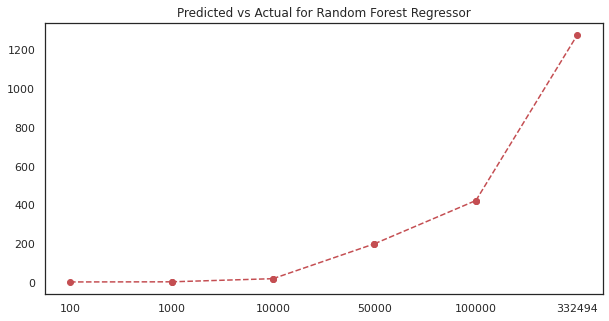

In [ ]:
train_size=['100', '1000', '10000', '50000', '100000', '332494']

import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
for i in range(len(train_size)-1):
  plt.plot([train_size[i],train_size[i+1]], [train_time_RF[i],train_time_RF[i+1]], 'ro',linestyle="--")
plt.title('Predicted vs Actual for Random Forest Regressor')
plt.show()

In [ ]:
start = time.time()
y_pred=regressor.predict(X_test)
end = time.time()

print('The time required to predict the outputs of the test dataset for random forest :', end-start)

The time required to predict the outputs of the test dataset for random forest : 3.6423728466033936


In [ ]:
y_pred_RF=y_pred

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.033257905148282295
Mean Squared Error: 0.0034329065736097
Root Mean Squared Error: 0.05859101115987073


In [ ]:
X_test_objid = df_test.iloc[:,0]
X_test_objid = np.asarray(X_test_objid)
objId=list(map(str,X_test_objid))[0:150]
y_test_sample=list(y_test)[0:150]
y_pred_sample=list(y_pred)[0:150]
sample_id=list(range(0, 150))

Text(0.5, 1.0, 'True vs Predicted values for Random Forest Regressor')


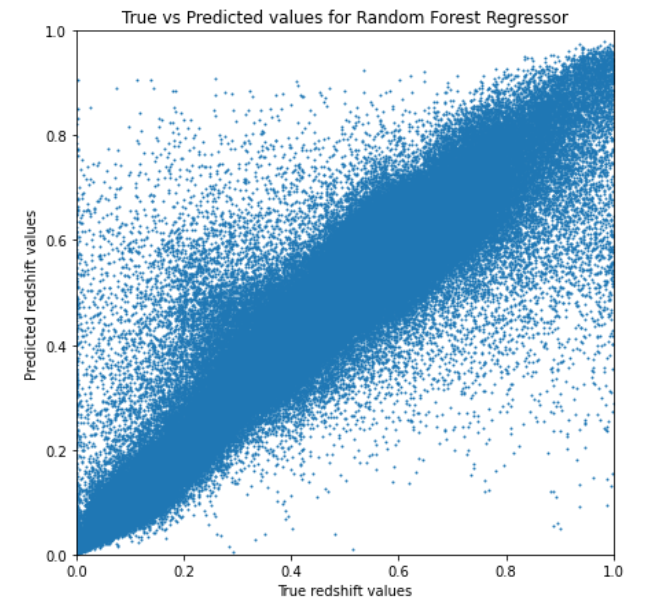

In [17]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('True vs Predicted values for Random Forest Regressor')

In [ ]:
score = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', score)

mse1 = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse1)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias1=np.mean(y_test- y_pred)
print('Bias :', bias1)

MAE : 0.033257905148282295
MSE : 0.0034329065736097
R2 score : 0.05859101115987073
Bias : -0.0004176686859945



# **Stacking Regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
import time

estimators = [('ET', ExtraTreesRegressor(n_estimators=100, random_state=0, criterion='absolute_error', max_depth=None)),('DT', DecisionTreeRegressor(random_state = 0, criterion='squared_error', splitter='best', max_depth=None)),('RF', RandomForestRegressor(n_estimators=50, random_state=0, criterion='squared_error', max_depth=None))]

regressor = StackingRegressor(estimators=estimators, final_estimator=MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=1, max_iter=10000))

scores = cross_val_score(regressor, X, y, cv=5)
scores

array([0.93289383, 0.9356428 , 0.93439106, 0.93403732, 0.93174431,
       0.9340813 , 0.94173453, 0.9356242 , 0.95271964, 0.94822328])

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
import time

estimators = [('ET', ExtraTreesRegressor(n_estimators=100, random_state=0, criterion='absolute_error', max_depth=None)),('DT', DecisionTreeRegressor(random_state = 0, criterion='squared_error', splitter='best', max_depth=None)),('RF', RandomForestRegressor(n_estimators=50, random_state=0, criterion='squared_error', max_depth=None))]

regressor = StackingRegressor(estimators=estimators, final_estimator=MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=1, max_iter=10000))

train_size=[X_train.shape[0]]
train_time_SR=[]

for i in train_size:
  X_train,y_train,X_test,y_test = train_test_split(i)
  start = time.time()
  regressor.fit(X_train, y_train)
  end = time.time()
  train_time_SR.append(end-start)

In [ ]:
train_size=np.asarray(train_size)
train_time_SR=np.asarray(train_time_SR)
train_size=np.asarray(list(map(str,train_size)))

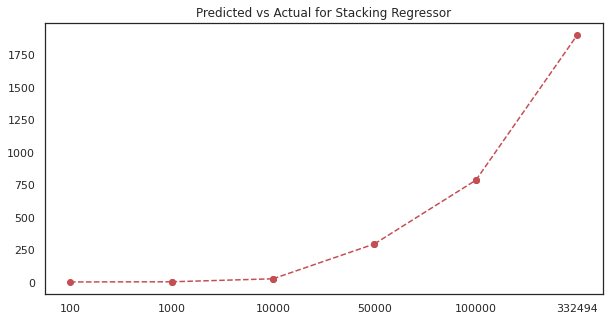

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
for i in range(len(train_size)-1):
  plt.plot([train_size[i],train_size[i+1]], [train_time_SR[i],train_time_SR[i+1]], 'ro',linestyle="--")
plt.title('Predicted vs Actual for Stacking Regressor')
plt.show()

In [ ]:
start = time.time()
y_pred=regressor.predict(X_test)
end = time.time()

print('The time required to predict the outputs of the test dataset for Stacking Regressor :', end-start)

The time required to predict the outputs of the test dataset for Stacking Regressor : 3.6423728466033936 


In [ ]:
y_pred_SR=y_pred

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.032976565547254799
Mean Squared Error: 0.0032274252583745313
Root Mean Squared Error: 0.056810432655435083


In [ ]:
X_test_objid = df_test.iloc[:,0]
X_test_objid = np.asarray(X_test_objid)
objId=list(map(str,X_test_objid))[0:150]
y_test_sample=list(y_test)[0:150]
y_pred_sample=list(y_pred)[0:150]
sample_id=list(range(0, 150))

Text(0.5, 1.0, 'True vs Predicted values for Stacking Regressor')


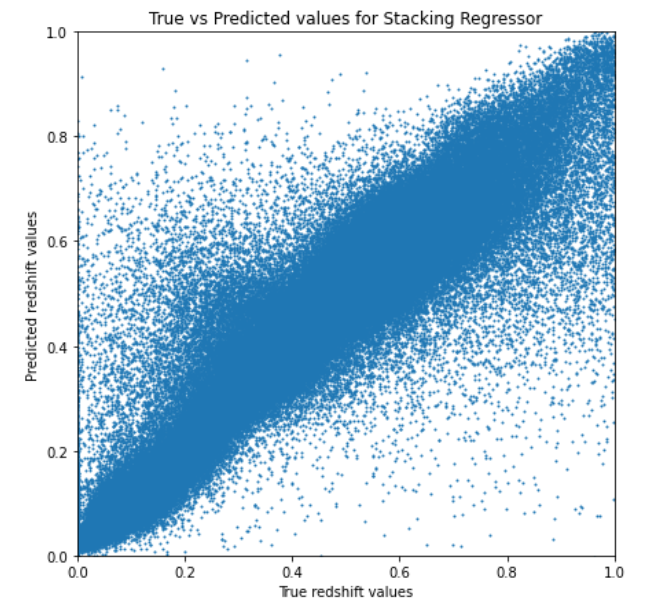

In [19]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('True vs Predicted values for Stacking Regressor')

In [ ]:
score = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', score)

mse1 = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse1)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias1=np.mean(y_test- y_pred)
print('Bias :', bias1)

MAE : 0.032976565547254799
MSE : 0.0032274252583745313
R2 score : 0.9322113028107047
Bias : -0.00217724388350219


# **Comparative Analysis**

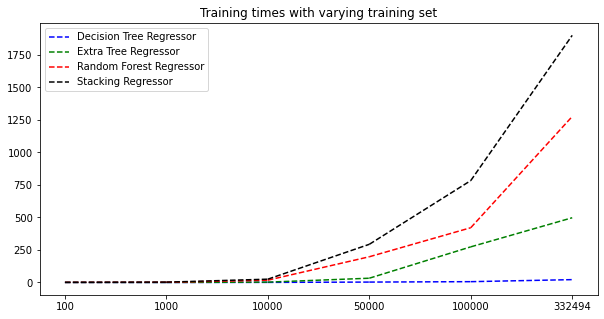

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

for i in range(len(train_size)-1):
  if(i==0):
    plt.plot([train_size[i],train_size[i+1]], [train_time_DT[i],train_time_DT[i+1]], 'b',linestyle="--", label='Decision Tree Regressor')
    plt.plot([train_size[i],train_size[i+1]], [train_time_ET[i],train_time_ET[i+1]], 'g',linestyle="--", label='Extra Tree Regressor')
    plt.plot([train_size[i],train_size[i+1]], [train_time_RF[i],train_time_RF[i+1]], 'r',linestyle="--", label='Random Forest Regressor')
    plt.plot([train_size[i],train_size[i+1]], [train_time_SR[i],train_time_SR[i+1]], 'k',linestyle="--", label='Stacking Regressor')
  else:
    plt.plot([train_size[i],train_size[i+1]], [train_time_DT[i],train_time_DT[i+1]], 'b',linestyle="--")
    plt.plot([train_size[i],train_size[i+1]], [train_time_ET[i],train_time_ET[i+1]], 'g',linestyle="--")
    plt.plot([train_size[i],train_size[i+1]], [train_time_RF[i],train_time_RF[i+1]], 'r',linestyle="--")
    plt.plot([train_size[i],train_size[i+1]], [train_time_SR[i],train_time_SR[i+1]], 'k',linestyle="--")

plt.title('Training times with varying training set')

plt.legend()
plt.show()

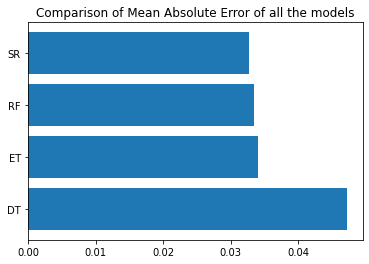

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["DT", "ET", "RF", "SR"])
y = np.array([0.0476630703, 0.0342825312, 0.0332579051, 0.03297656554])

plt.title("Comparison of Mean Absolute Error of all the models")
plt.barh(x, y)
plt.show()

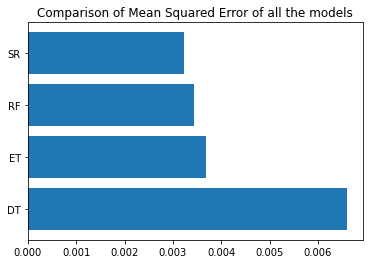

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["DT", "ET", "RF", "SR"])
y = np.array([0.0069246184, 0.0037326702, 0.0034329065, 0.0032274258])

plt.title("Comparison of Mean Squared Error of all the models")
plt.barh(x, y)
plt.show()

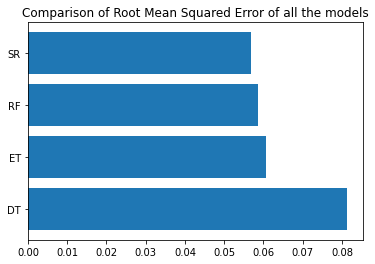

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["DT", "ET", "RF", "SR"])
y = np.array([0.0832142920, 0.058866696, 0.0585910111, 0.05681043265])

plt.title("Comparison of Root Mean Squared Error of all the models")
plt.barh(x, y)
plt.show()

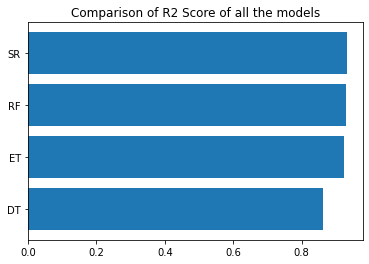

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["DT", "ET", "RF", "SR"])
y = np.array([0.8551155027, 0.921900963, 0.929148101, 0.9322113028])

plt.title("Comparison of R2 Score of all the models")
plt.barh(x, y)
plt.show()

In [ ]:
arr1=[]
for i in range(83124):
  arr1.append("True Values")
for i in range(83124):
  arr1.append("DT")
for i in range(83124):
  arr1.append("ET")
for i in range(83124):
  arr1.append("RF")
for i in range(83124):
  arr1.append("SR")

In [ ]:
y_test=np.array(y_test)

In [ ]:
y_true=y_test.tolist()
len(y_true)

83124

In [ ]:
arr=y_true+y_pred_DT.tolist()+y_pred_ET.tolist()+y_pred_RF.tolist()+y_pred_SR.tolist()
len(arr)

415620

In [ ]:
data = {'z': arr,
        'model': arr1}
 
df1 = pd.DataFrame(data)

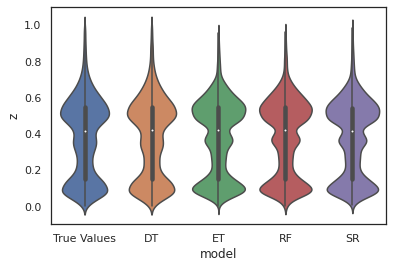

In [ ]:
import seaborn
seaborn.set(style="white")
seaborn.violinplot(x="model", y="z", data=df1, gridsize=400)

# **Outlier Analysis For Stacking Regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
import time

estimators = [('ET', ExtraTreesRegressor(n_estimators=100, random_state=0, criterion='absolute_error', max_depth=None)),('DT', DecisionTreeRegressor(random_state = 0, criterion='squared_error', splitter='best', max_depth=None)),('RF', RandomForestRegressor(n_estimators=50, random_state=0, criterion='squared_error', max_depth=None))]

regressor = StackingRegressor(estimators=estimators, final_estimator=MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=1, max_iter=10000))


**For interval 0-0.2**

In [ ]:
intervals = pd.IntervalIndex.from_tuples([(0.2, 1)])

df_bin1_test=df_test.loc[pd.cut(df.redshift, intervals, include_lowest=True).isna()]


In [ ]:
X_test_bin1=df_bin1_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y_test_bin1=df_bin1_test.iloc[:,18]

In [ ]:
y_pred=reg.predict(X_test_bin1)
y_test=y_test_bin1

In [ ]:
import numpy as np
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', mae)

mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', rmse)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias=np.mean(y_test- y_pred)
print('Bias :', bias)

outliers=y_pred[abs(y_test-y_pred)/(1 + y_test)>0.15] 
print('Catastrophic Outliers: ',outliers.shape[0]*100.0/y_test.shape[0],'%')

MAE : 0.021136160705323537
MSE : 0.002424274686743693
RMSE : 0.04923692401789223
R2 score : -0.0866998564125967
Bias : -0.009537928405804235
Catastrophic Outliers:  1.443263194422537 %


In [ ]:
outliers

array([0.34519356, 0.45947497, 0.26036489, ..., 0.35207876, 0.26711358,
       0.52501378])

In [ ]:
outliers.shape[0]

1830

Text(0.5, 1.0, 'True vs Predicted values for Stacking Regressor for redshift range 0 to 0.2')

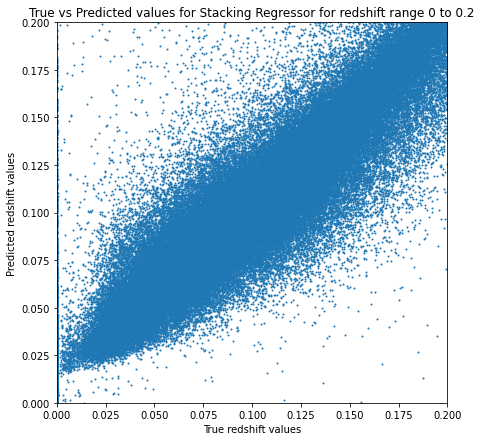

In [ ]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0,0.2)
plt.ylim(0,0.2)
plt.title('True vs Predicted values for Stacking Regressor for redshift range 0 to 0.2')

**For interval 0.2-0.4**

In [ ]:
intervals = pd.IntervalIndex.from_tuples([(0, 0.2),(0.4,1)])

df_bin2_test=df_test.loc[pd.cut(df.redshift, intervals, include_lowest=True).isna()]

In [ ]:
X_test_bin2=df_bin2_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y_test_bin2=df_bin2_test.iloc[:,18]


In [ ]:
y_pred=reg.predict(X_test_bin2)
y_test=y_test_bin2

In [ ]:
import numpy as np
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', mae)

mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', rmse)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias=np.mean(y_test- y_pred)
print('Bias :', bias)

outliers=y_pred[abs(y_test-y_pred)/(1 + y_test)>0.15] 
print('Catastrophic Outliers: ',outliers.shape[0]*100.0/y_test.shape[0],'%')

MAE : 0.03468996942643617
MSE : 0.0036947129408022176
RMSE : 0.060784150407834255
R2 score : 0.3306463652560614
Bias : -0.018413274891892706
Catastrophic Outliers:  2.293218345746766 %


In [ ]:
outliers

array([0.54170647, 0.52961031, 0.46997395, ..., 0.80136479, 0.54179437,
       0.57746606])

In [ ]:
outliers.shape[0]

1755

Text(0.5, 1.0, 'True vs Predicted values for Stacking Regressor for redshift range 0.2 to 0.4')

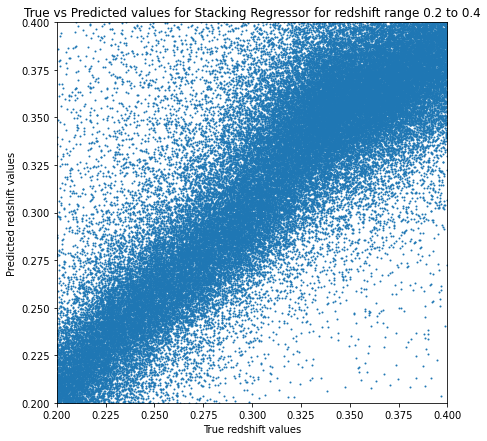

In [ ]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0.2,0.4)
plt.ylim(0.2,0.4)
plt.title('True vs Predicted values for Stacking Regressor for redshift range 0.2 to 0.4')

**For interval 0.4-0.6**

In [ ]:
intervals = pd.IntervalIndex.from_tuples([(0, 0.4),(0.6,1)])

df_bin3_test=df_test.loc[pd.cut(df.redshift, intervals, include_lowest=True).isna()]

In [ ]:
X_test_bin3=df_bin3_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y_test_bin3=df_bin3_test.iloc[:,18]

In [ ]:
y_pred=reg.predict(X_test_bin3)
y_test=y_test_bin3

In [ ]:
import numpy as np
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', mae)

mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', rmse)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias=np.mean(y_test- y_pred)
print('Bias :', bias)

outliers=y_pred[abs(y_test-y_pred)/(1 + y_test)>0.15] 
print('Catastrophic Outliers: ',outliers.shape[0]*100.0/y_test.shape[0],'%')

MAE : 0.03316954920927542
MSE : 0.0021346477499101578
RMSE : 0.04620224832094384
R2 score : 0.6311632970978455
Bias : -0.009942622819350412
Catastrophic Outliers:  0.30263754365578494 %


Text(0.5, 1.0, 'True vs Predicted values for Stacking Regressor for redshift range 0.4 to 0.6')

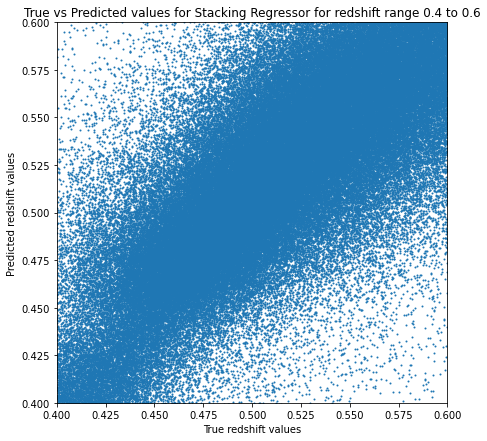

In [ ]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0.4,0.6)
plt.ylim(0.4,0.6)
plt.title('True vs Predicted values for Stacking Regressor for redshift range 0.4 to 0.6')

**For interval 0.6-0.8**

In [ ]:
intervals = pd.IntervalIndex.from_tuples([(0, 0.6),(0.8,1)])

df_bin4_test=df_test.loc[pd.cut(df.redshift, intervals, include_lowest=True).isna()]


X_test_bin4=df_bin4_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y_test_bin4=df_bin4_test.iloc[:,18]

In [ ]:
y_pred=reg.predict(X_test_bin4)
y_test=y_test_bin4

In [ ]:
import numpy as np
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', mae)

mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', rmse)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias=np.mean(y_test- y_pred)
print('Bias :', bias)

outliers=y_pred[abs(y_test-y_pred)/(1 + y_test)>0.15] 
print('Catastrophic Outliers: ',outliers.shape[0]*100.0/y_test.shape[0],'%')

MAE : 0.05172759125689556
MSE : 0.0053839605945932125
RMSE : 0.0733754767929532
R2 score : 0.6935333776841689
Bias : 0.029151910936479546
Catastrophic Outliers:  1.1241157079891848 %


Text(0.5, 1.0, 'True vs Predicted values for Stacking Regressor for redshift range 0.6 to 0.8')

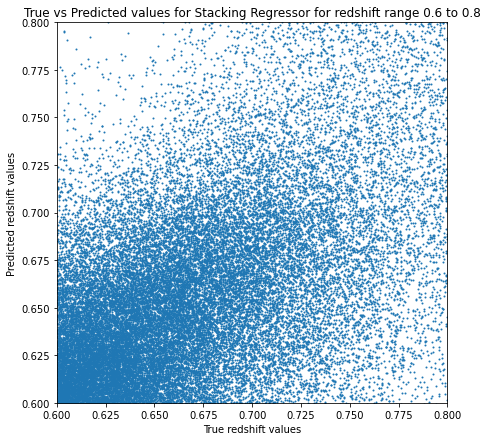

In [ ]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0.6,0.8)
plt.ylim(0.6,0.8)
plt.title('True vs Predicted values for Stacking Regressor for redshift range 0.6 to 0.8')

**For interval 0.8-1**

In [ ]:
intervals = pd.IntervalIndex.from_tuples([(0, 0.8)])

df_bin5_test=df_test.loc[pd.cut(df.redshift, intervals, include_lowest=True).isna()]

X_test_bin5=df_bin5_test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]]
y_test_bin5=df_bin5_test.iloc[:,18]

In [ ]:
y_pred=reg.predict(X_test_bin5)
y_test=y_test_bin5

In [ ]:
import numpy as np
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE :', mae)

mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', rmse)

r2_score = metrics.r2_score(y_test, y_pred)
print('R2 score :', r2_score)

bias=np.mean(y_test- y_pred)
print('Bias :', bias)

outliers=y_pred[abs(y_test-y_pred)/(1 + y_test)>0.15] 
print('Catastrophic Outliers: ',outliers.shape[0]*100.0/y_test.shape[0],'%')

MAE : 0.11577104809499723
MSE : 0.030956462081017034
RMSE : 0.17594448579315305
R2 score : 0.7623533809376315
Bias : 0.09324257178048784
Catastrophic Outliers:  11.618257261410788 %


Text(0.5, 1.0, 'True vs Predicted values for Stacking Regressor for redshift range 0.8 to 1')

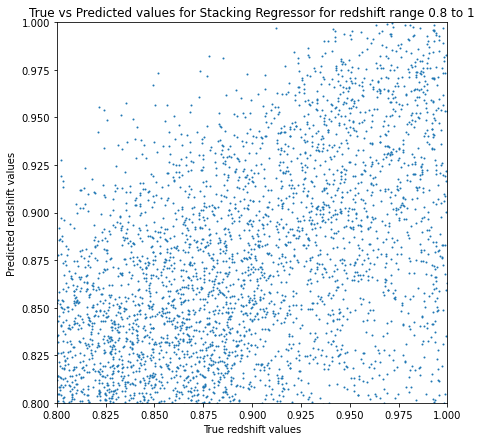

In [ ]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_test, y_pred,s=1)
#plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlabel('True redshift values')
plt.ylabel('Predicted redshift values')
plt.xlim(0.8,1)
plt.ylim(0.8,1)
plt.title('True vs Predicted values for Stacking Regressor for redshift range 0.8 to 1')